In [1]:
# UNAD Santiago Cepeda Vargas - Árbol de Decisiones
# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [3]:
#Instalamos las bibliotecas necesarias
!pip install pandas numpy scikit-learn matplotlib

In [173]:
#Importamos las librerías necesarias
import numpy as np #Librerias para el cálculo numérico y el análisis de datos
import pandas as pd #Librerias para el manejo y análisis de estructuras de datos
import seaborn as sns #Librerias para la creación de gráficos estadísticos
import matplotlib.pyplot as plt #Librerias para creación de gráficos en dos dimensiones
#Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
#Cargamos el dataset "winequality-red" para la regresión logistica
data = pd.read_csv('C:/Users/Usuario/Desktop/ANALISIS DE DATOS/Datasets/Anexo 4 - Dataset Red Wine Quality/winequality-red.csv')

In [9]:
# Mostrar las primeras filas del dataset para entender su estructura
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [11]:
#Visualizamos la descripción de los datos
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
#Comprobamos las dimensiones del conjunto de datos
data.shape

(1599, 12)

In [15]:
#Y comprobamos la descripción estadística
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
#Comprobamos si existen valores nulos
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Histograma de características:


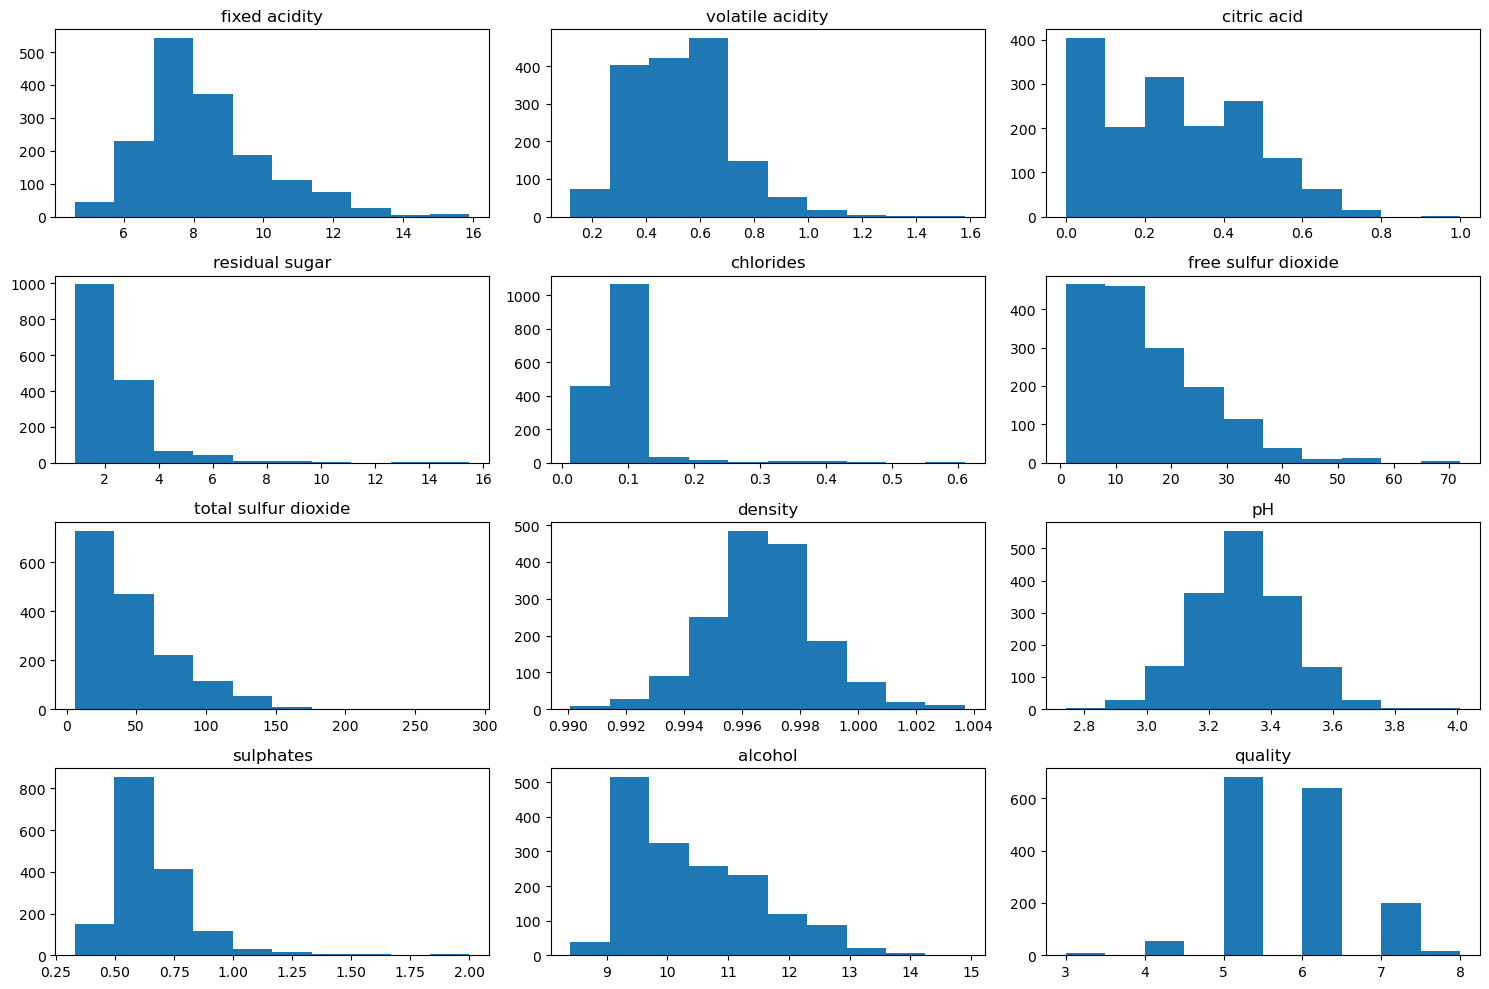

In [35]:
#Desplegamos histogramas para comprobar los cambios en cada característica del producto 
print("\nHistograma de características:")
data.hist(bins=10, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()


Diagramas de caja de características:


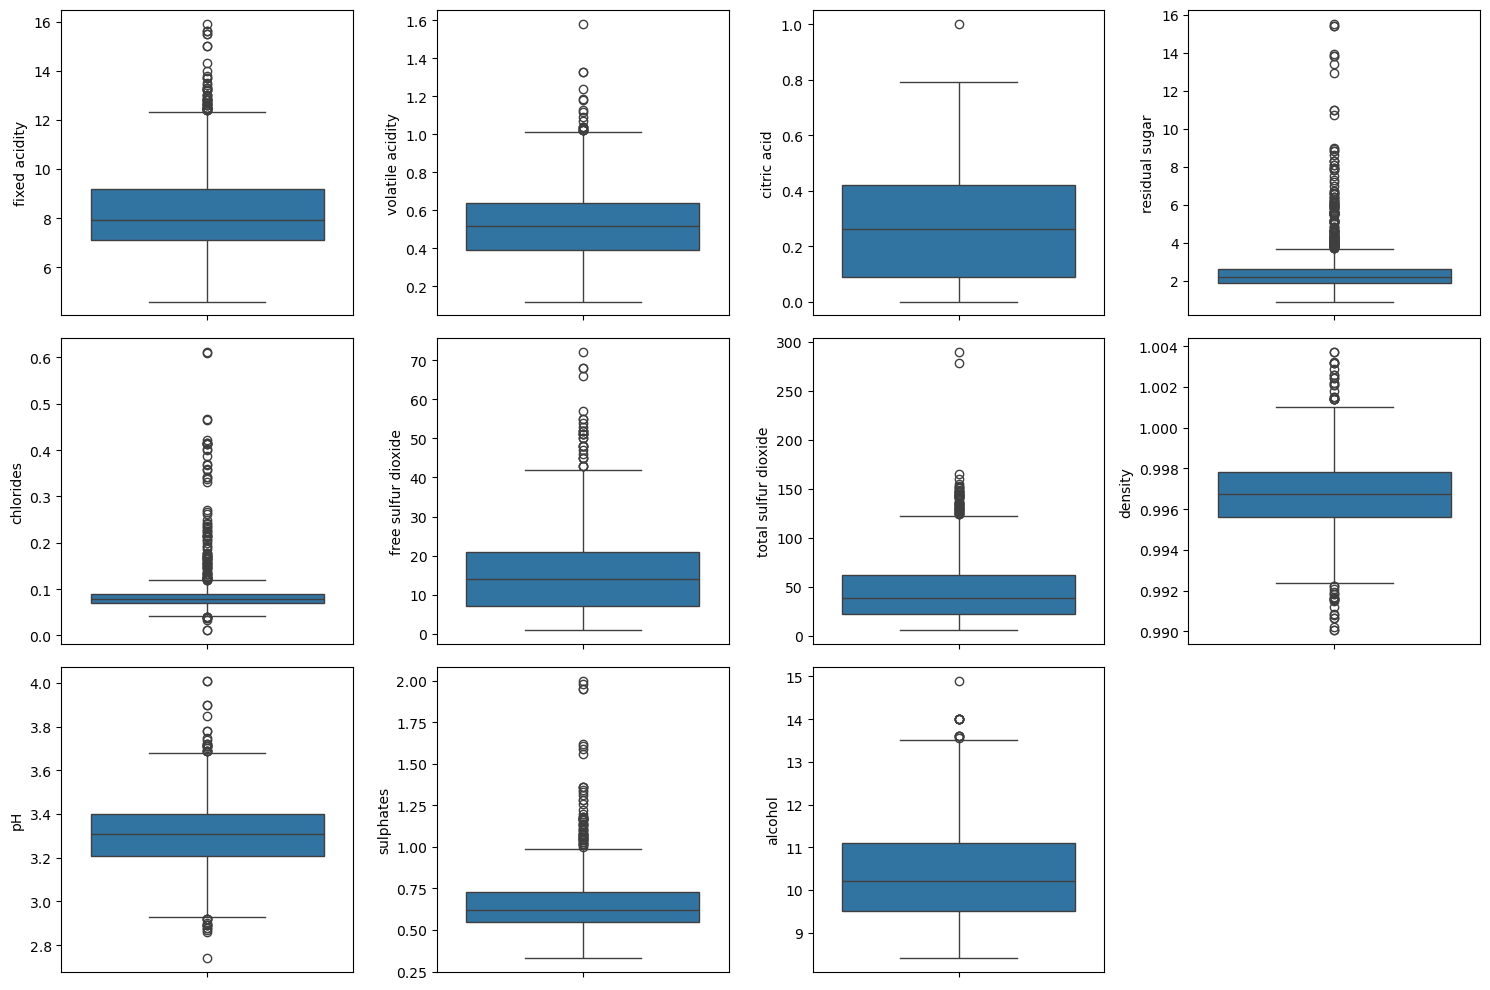

In [67]:
#Desplegamos diagramas de caja para identificar valores atípicos
print("\nDiagramas de caja de características:")
plt.figure(figsize=(15, 10))
for index, column in enumerate(data.columns[:-1]):  # Excluir la columna 'quality'
    plt.subplot(3, 4, index + 1)
    sns.boxplot(y=column, data=data)
plt.tight_layout()
plt.show()

In [69]:
#Establecemos las columnas a usar como predictores
predictors_col = ["alcohol", "pH", "sulphates", "quality"]
target_col = ['alcohol'] #Estabecemos la columna a usar como objetivo
#Dividimos el  dataset en dos columnas para desarrollar lo anterior
predictors = data[predictors_col]
target = data[target_col]

In [71]:
#Comprobamos los predictors
predictors

,alcohol,pH,sulphates,quality
0,9.4,3.51,0.56,5
1,9.8,3.20,0.68,5
2,9.8,3.26,0.65,5
3,9.8,3.16,0.58,6
4,9.4,3.51,0.56,5
...,...,...,...,...
1594,10.5,3.45,0.58,5
1595,11.2,3.52,0.76,6
1596,11.0,3.42,0.75,6
1597,10.2,3.57,0.71,5


In [61]:
#Comprobamos el objetivo
target

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
1594,10.5
1595,11.2
1596,11.0
1597,10.2


In [65]:
#Comprobamos las correlaciones entre los datos. Los valores cercanos a 1 indican una alta correlación directa
corr = predictors.corr()
corr

,alcohol,pH,sulphates,quality
alcohol,1.000000,0.205633,0.093595,0.476166
pH,0.205633,1.000000,-0.196648,-0.057731
sulphates,0.093595,-0.196648,1.000000,0.251397
quality,0.476166,-0.057731,0.251397,1.000000


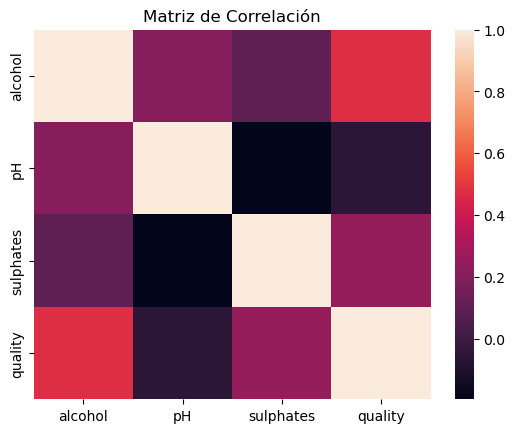

In [75]:
#Comprobamos la matriz de correlación que nos muestra de forma gráfica las correlaciones
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [99]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

#Características a tomar en cuenta:
#Determinamos y predecimos la calidad del vino
X = data.drop('quality', axis=1)  #Característica a evaluar
y = data['quality']  #Objetivo

In [103]:
#Entrenamos un árbol de decisión que nos muestre la reelevancia de las características seleccionadas (calidad)
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [109]:
#Obtenemos la relevancia de las características y las ordenamos
feature = pd.DataFrame(tree.feature_importances_,
                                   index=X.columns,
                                   columns=['relevance']).sort_values('relevance', ascending=False)
#Mostramos el resultado
print("Relevancia de las características:")
print(feature)

Relevancia de las características:
                      relevance
alcohol                0.187183
sulphates              0.129289
total sulfur dioxide   0.111457
volatile acidity       0.103277
pH                     0.083404
residual sugar         0.077773
fixed acidity          0.064803
density                0.064103
free sulfur dioxide    0.063048
citric acid            0.059538
chlorides              0.056126


In [113]:
#Seleccionamos las características más relevante según un criterio a elección, en este caso,mayor a 0.05
selection = feature_importances[feature_importances['relevance'] > 0.05].index
#Mostramos el resultado
print("\nSelección de Características:")
print(selected_features)


Selección de Características:
Index(['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity',
       'pH', 'residual sugar', 'fixed acidity', 'density',
       'free sulfur dioxide', 'citric acid', 'chlorides'],
      dtype='object')


In [119]:
#Creamos un DataFrame que almacene las características seleccionadas para el análisis
X_selection = X[selected_features]
print("\nNueva selección:")
print(X_selection.head())


Nueva selección:
   alcohol  sulphates  total sulfur dioxide  volatile acidity    pH  \
0      9.4       0.56                  34.0              0.70  3.51   
1      9.8       0.68                  67.0              0.88  3.20   
2      9.8       0.65                  54.0              0.76  3.26   
3      9.8       0.58                  60.0              0.28  3.16   
4      9.4       0.56                  34.0              0.70  3.51   

   residual sugar  fixed acidity  density  free sulfur dioxide  citric acid  \
0             1.9            7.4   0.9978                 11.0         0.00   
1             2.6            7.8   0.9968                 25.0         0.00   
2             2.3            7.8   0.9970                 15.0         0.04   
3             1.9           11.2   0.9980                 17.0         0.56   
4             1.9            7.4   0.9978                 11.0         0.00   

   chlorides  
0      0.076  
1      0.098  
2      0.092  
3      0.075  
4    

In [89]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

[Text(0.43755723443223443, 0.9772727272727273, 'x[10] <= 10.15\ngini = 0.643\nsamples = 1279\nvalue = [8.0, 42.0, 545.0, 510.0, 159.0, 15.0]'),
 Text(0.22869352869352869, 0.9318181818181818, 'x[9] <= 0.575\ngini = 0.507\nsamples = 634\nvalue = [4, 22, 403, 187, 17, 1]'),
 Text(0.3331253815628816, 0.9545454545454546, 'True  '),
 Text(0.08884004884004884, 0.8863636363636364, 'x[10] <= 9.75\ngini = 0.386\nsamples = 273\nvalue = [2.0, 13.0, 208.0, 48.0, 2.0, 0.0]'),
 Text(0.03545787545787546, 0.8409090909090909, 'x[10] <= 9.075\ngini = 0.321\nsamples = 193\nvalue = [2, 10, 157, 23, 1, 0]'),
 Text(0.012503052503052503, 0.7954545454545454, 'x[0] <= 8.15\ngini = 0.708\nsamples = 12\nvalue = [1, 3, 4, 4, 0, 0]'),
 Text(0.0062515262515262515, 0.75, 'x[9] <= 0.515\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3, 0, 0, 0]'),
 Text(0.0031257631257631258, 0.7045454545454546, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.009377289377289377, 0.7045454545454546, 'gini = 0.0\nsamples = 3\n

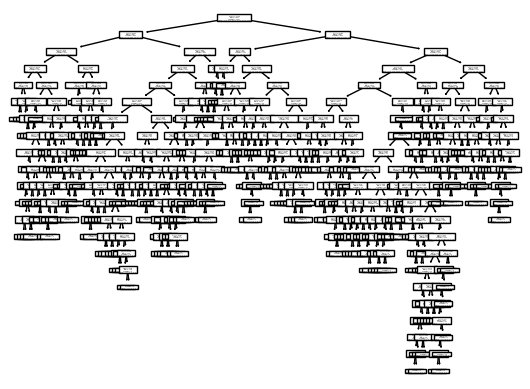

In [131]:
#Dividimos el dataset en entrenamiento y prueba, usando un 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#Creamos un arbol de decisión
p_tree = DecisionTreeClassifier()
#Le asignamos las variables de entrenamiento y prueba
tree = p_tree.fit(X_train, y_train)
#Ploteamos el arbol
plot_tree(tree)

In [132]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros

In [137]:
#Inicializamos el modelo de árbol de decisión con hiperparámetros establecidos para mejorar el rendimiento
tree_2 = DecisionTreeClassifier(max_depth=2, random_state=13)
tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

[Text(0.5, 0.8333333333333334, 'x[10] <= 10.15\ngini = 0.643\nsamples = 1279\nvalue = [8.0, 42.0, 545.0, 510.0, 159.0, 15.0]'),
 Text(0.25, 0.5, 'x[9] <= 0.575\ngini = 0.507\nsamples = 634\nvalue = [4, 22, 403, 187, 17, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.386\nsamples = 273\nvalue = [2.0, 13.0, 208.0, 48.0, 2.0, 0.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.558\nsamples = 361\nvalue = [2.0, 9.0, 195.0, 139.0, 15.0, 1.0]'),
 Text(0.75, 0.5, 'x[1] <= 0.363\ngini = 0.651\nsamples = 645\nvalue = [4, 20, 142, 323, 142, 14]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.622\nsamples = 172\nvalue = [0, 1, 19, 72, 75, 5]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.629\nsamples = 473\nvalue = [4, 19, 123, 251, 67, 9]')]

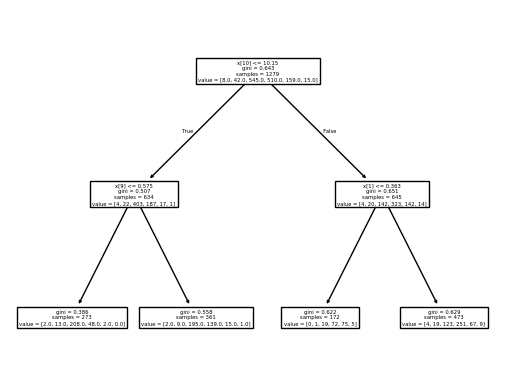

In [139]:
#Ploteamos el arbol
plot_tree(tree)

In [145]:
#Establecemos predicciones
pred = tree.predict(X_test)
#Mostramos las predicciones
pred

array([7, 6, 5, 5, 6, 7, 5, 5, 5, 7, 5, 5, 5, 6, 6, 6, 5, 5, 7, 7, 6, 5,
       7, 5, 5, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 5, 5, 7,
       7, 5, 7, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 7, 6,
       6, 5, 5, 5, 7, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5, 6, 6, 5, 5, 5, 6, 6,
       7, 5, 5, 5, 6, 7, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 7, 5, 7, 7, 7,
       5, 5, 5, 5, 6, 6, 5, 5, 7, 7, 7, 5, 7, 7, 5, 6, 5, 5, 5, 6, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 5, 7, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 7, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 7, 5,
       5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 7, 6, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6,
       7, 5, 5, 5, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 7, 7, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 7, 5,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 7, 5, 5, 6, 5, 5, 6, 5, 6, 7, 6,
       6, 5, 5, 5, 7, 7, 6, 5, 6, 5, 6, 5, 5, 6, 5,

In [141]:
#6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [149]:
#Realizamos predicciones en el conjunto seleccionado para la prueba
y_pred = tree_2.predict(X_test)
#Calculamos métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#Mostramos lo resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5125
Recall: 0.5125
F1 Score: 0.4938823064809176


In [185]:
#7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

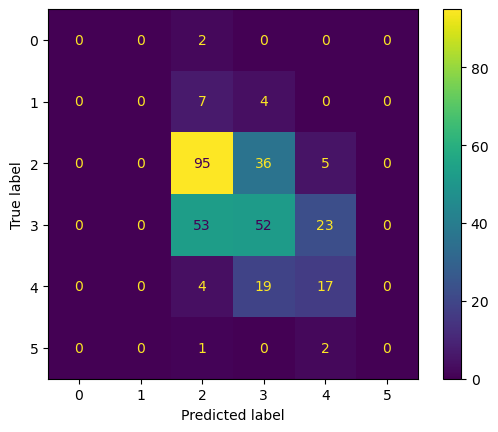

In [177]:
#Mostramos resultados en una matriz de confusión
cm = confusion_matrix(y_test, pred)
#Dibujamos la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 
plt.show()   

In [189]:
#Comprobamos la precisión
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5125

In [187]:
#8.Interpretar, analizar y documentar los resultados obtenidos.

In [ ]:
#Análisis de resultados
#Al evaluar los resultados, considera lo siguiente:

#Se observa qué tan importante es alcohol frente a otras características (como acidez o sulfatos), por tanto tiene una gran influencia en la misma
#calidad del vino. 

#Se presentan correlaciones entre los datos alcohol, pH, calidad, que determinan relaciones variables, presentando gran correlación en unos casos
#y muy poca en otros.